In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
user='Nhrok'

In [2]:
animes = pd.read_csv(f"./{user}_Anime_Preprocessed.csv")
animes.drop("Unnamed: 0",axis=1,inplace=True)
animes.head()

,id,title,synopsis,genres
0,873,.hack//roots,termination incredibly popular virtual reality...,Adventure|Drama|Fantasy|Game|Sci-Fi|
1,41380,100-man no inochi no ue ni ore wa tatteiru,yuusuke yotsuka always disliked tokyo especial...,Action|Drama|Fantasy|Game|Shounen|
2,44881,100-man no inochi no ue ni ore wa tatteiru 2nd...,game master world quest unexpectedly pull yuus...,Drama|Fantasy|Game|Shounen|
3,35248,18if,waking strange bedroom dream world teenager ha...,Mystery|Supernatural|
4,36793,3d kanojo: real girl,hikari tsutsui life within two dimensional rea...,Romance|School|Shoujo|


# Questions:

## Which are the genres that the USER most watched so far ?
## Which are the most common words in all those synopsis ?


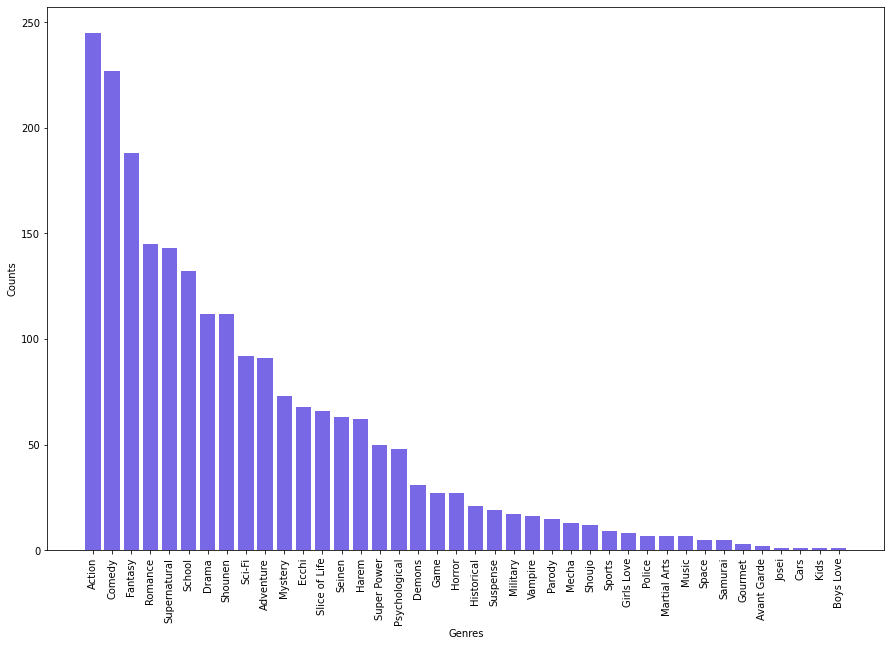

<Figure size 720x720 with 0 Axes>

In [63]:
# count the number of occurences for each genre in the data set
counts = dict()
for i in animes.index:
    for g in animes.loc[i,'genres'].split('|')[0:len(animes.loc[i,'genres'].split('|'))-1]:
        if g not in counts:
            counts[g] = 1
        else:
            counts[g] = counts[g] + 1
counts=dict(sorted(counts.items(), key=lambda item: item[1],reverse=True))
# create a bar chart
plt.bar(list(counts.keys()),counts.values(), color='#7868E6')
plt.xticks(rotation=90, fontsize=10, )
plt.xlabel('Genres')
plt.ylabel('Counts')
fig1 = plt.gcf()
fig1.savefig("./img/GenreXCount.jpg")
plt.figure(figsize=(10, 10))
plt.show()


In [53]:
print(counts)

{'Action': 245, 'Comedy': 227, 'Fantasy': 188, 'Romance': 145, 'Supernatural': 143, 'School': 132, 'Drama': 112, 'Shounen': 112, 'Sci-Fi': 92, 'Adventure': 91, 'Mystery': 73, 'Ecchi': 68, 'Slice of Life': 66, 'Seinen': 63, 'Harem': 62, 'Super Power': 50, 'Psychological': 48, 'Demons': 31, 'Game': 27, 'Horror': 27, 'Historical': 21, 'Suspense': 19, 'Military': 17, 'Vampire': 16, 'Parody': 15, 'Mecha': 13, 'Shoujo': 12, 'Sports': 9, 'Girls Love': 8, 'Police': 7, 'Martial Arts': 7, 'Music': 7, 'Space': 5, 'Samurai': 5, 'Gourmet': 3, 'Avant Garde': 2, 'Josei': 1, 'Cars': 1, 'Kids': 1, 'Boys Love': 1}


In [22]:
animes.loc[animes['genres'].str.contains('Psychological') ][:5]

,id,title,synopsis,genres
50,31043,boku dake ga inai machi,tragedy strike satoru fujinuma find sent back ...,Mystery|Psychological|Seinen|Supernatural|
61,369,boogiepop wa warawanai,five year ago string grisly murder shook city ...,Avant Garde|Drama|Horror|Mystery|Psychological...
63,14345,btooom!,ryouta sakamoto unemployed life mother real ac...,Action|Psychological|Sci-Fi|Seinen|
82,34103,danganronpa 3: the end of kibougamine gakuen -...,future foundation shamble final killing game r...,Action|Horror|Mystery|Psychological|
83,32189,danganronpa 3: the end of kibougamine gakuen -...,makoto naegi fellow survivor escaped hope peak...,Action|Horror|Mystery|Psychological|


### WORD CLOUD


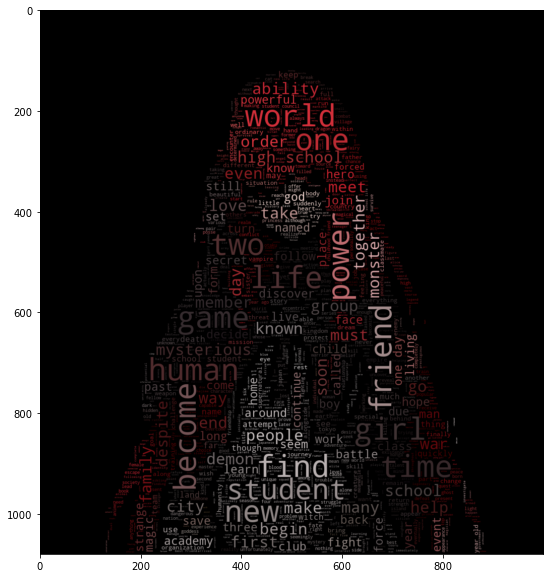

In [67]:
import os
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

image_ani="./img/Character-Rozen-Portrait.jpg"
image_new=image_ani[:-4]+"_new."+image_ani[-4:]

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load text on synopsis
text = ''
for s in animes['synopsis']:
    text = text + str(s)

# load image.
image_color = np.array(Image.open(os.path.join(d, image_ani)))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
image_color = image_color[::, ::]

# create mask white is "masked out"
image_mask = image_color.copy()
image_mask[image_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(image_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=20000, mask=image_mask, max_font_size=60, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
# plt.figure(figsize=(15, 10))
# plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(image_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file(image_new)

# plt.figure(figsize=(15, 10))
# plt.title("Original Image")
# plt.imshow(image_color)

# plt.figure(figsize=(15, 10))
# plt.title("Edge map")
# plt.imshow(edges)
# plt.show()